# Introduction à la Science des données


## Travail pratique 03 - Modélisation et analyse de performances

[Table des matières](#toc)

**Informations de groupe - Prénoms et noms complets:**

- TCHINDA FEZE Cedrick Vanel
- ...
- ...

**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing, Arthur Babey, Cédric Campos Carvalho

**Contact**: prenom.nom@heig-vd.ch ou de préférence via Teams 

### Modalités de rendu :

- **Date**: <span style="background-color:#eebbdd">01.12.2024, 23h55</span>


- **Travail par groupe** de 2 ou 3. 


- Une fois complété, rendez directement le notebook (fichier avec l'extension _.ipynb_) nommé correctement comme suit <span style="background-color:#eebbdd">"**TP3_ISD_SA2024_Nom1_Nom2(_Nom3).ipynb**"</span> en mettant les noms de famille de chaque membres du groupe (pour ceux avec plusieurs noms de famille, vous pouvez mettre juste le premier comme dans l'adresse email). Les TPs rendu avec un fichier mal nommé seront pénalisé !


- Mettez vos Prénoms et noms en entier ci-dessus. 


- Uploadez le fichier complété avant le délais sur Cyberlearn ou Teams selon les consignes données. 



### Déroulement et notation


<div class="alert alert-block alert-info">
    <b>Les questions</b> sont généralement indiquées en <b>gras</b>, en <span style="background-color:#AFEEEE">bleu</span> ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "<i>Réponse:</i>" pour les réponses textuelles. Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre. 
</div>


<div class="alert alert-block alert-info">
    <b>Notation: </b> Ce TP est noté sur 6 avec un total de  <span style="background-color:#eebbdd"><b>80</b></span> points. Les points sont indiqués pour chaques parties du travail pour un total de <span style="background-color:#eebbdd"><b>76</b></span> points  et <span style="background-color:#eebbdd"><b>4</b></span> points supplémentaires sont attribués au rendu du travail (format et nommage selon les consignes) et à la propreté (lisibilité et mise en page, tournure de phrase des réponses). 
</div>


<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn/Teams ou un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points obtenus. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>

---


<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Comprendre la modélisation avec un modèle simple: le modèle à base de règles
- Analyse des résultats avec la matrice de confusion
- Algorithme kNN
- Évaluation des performances avec Validation hold-out et N-Fold Crossvalidation. 

<div class="alert alert-block alert-info">
<b>Aide </b>
</div>

N'oubliez pas que vous pouvez retourner vers les TPs précédents si vous avez des questions sur Python, Numpy, Pandas ou Matplotlib. Gardez vos cheatsheets à proximité !

- [Data wrangling with Pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib cheatscheets](https://matplotlib.org/cheatsheets/)

<div class="alert alert-block alert-info">
<b>N'hésitez pas à écrire à vos assistants directement sur Teams en cas de question.  </b>
</div>



---


<!-- @import "[TOC]" {cmd="toc" depthFrom=1 depthTo=6 orderedList=false} -->


### Table des matières<a class="anchor"  id="toc"></a>


[Partie 1: Modèle à base de règles](#Part1)

[- 1.1 Analyse exploratoire](#Part11)

[- 1.2 Boxplots, pairplot et choix des variables](#Part12)     ---    [20 points](#Part112pts)

[- 1.3 Création du modèle à base de règles](#Part13)

[- 1.4 Matrice de confusion](#Part14)     ---    [16 points](#Part134pts)

---

[Partie 2: L'algorithme des k plus proches voisins (k-NN) ](#Part2)  

[- 2.1 Implémentation](#Part21)    ----    [12 points](#Part21pts)

[- 2.2 Validation hold-out](#Part22)    ----    [10 points](#Part22pts)

[- 2.3 N-Folds Cross Validation](#Part23)    ----    [10 points](#Part23pts)

[- 2.4 Conclusion](#Part24)    ----    [8 points](#Part24pts)



---

<p style="background-color:#7ba3e3;padding:10px"><font size="6"><b></b></font></p>

---


In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from math import sqrt
import itertools

# Package scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Pour k-NN
from collections import Counter, defaultdict

# Pour validation hold-out

import random
from random import randrange
random.seed(10)

---


## Partie 1 - Modèle à base de règles<a class="anchor"  id="Part1"></a>

[Table des matières](#toc)

[- 1.1 Analyse exploratoire](#Part11)

[- 1.2 Boxplots, pairplot et choix des variables](#Part12)     ---    [20 points](#Part112pts)

[- 1.3 Création du modèle à base de règles](#Part13)

[- 1.4 Matrice de confusion](#Part14)     ---    [16 points](#Part134pts)

Dans cette partie, nous allons créer un modèle de classification simple. 


---
<a class="anchor"  id="Part11"></a>
### 1.1 Analyse exploratoire

[Début partie 1](#Part1) --- [Table des matières](#toc)

Nous allons utiliser la base de données «Wine Data Set » disponible sur le dépôt de bases de données maintenu par l’Université de Californie à Irvine (UCI). Le lien est celui-ci : [http://archive.ics.uci.edu/ml/datasets/Wine?Quality].

Créez un DataFrame à partir du fichier **wine.data** et des noms de colonnes fournis, puis explorez rapidement les données. Ouvrez rapidement le fichier et observez les données pour voir leur structure et mieux comprendre la suite et posez-vous ces questions (pas besoin de noter une réponse): 

- *De quel manière sont stockées les données ?* 
- *Pourquoi on nous donne une liste de noms de colonne ?*

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Chargez les données comme indiqué ci-dessous. Si vous le voulez vous pouvez directement charger ces données depuis Scikit-learn, à vous de trouver comment faire.</p>
(2 points)



Notes:

- Utilisez la fonction read_csv() pour lire le fichier **wine.data** et spécifiez le paramètre *names* en lui passant la liste donnée ci-dessous.
- La fonction [_unique()_](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) peut vous être utile !

In [2]:
# 1. Charger les données

headers = ['Class', 'Alcool', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
           'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wines = pd.read_csv('wine.data', header=None, names=headers)

# 2. Explorer rapidement les données
# Afficher les premières lignes
print("Premières lignes du dataset:")
print(wines.head(30))

# Informations sur le DataFrame
print("\nInformations sur le dataset:")
print(wines.info())

# Statistiques descriptives
print("\nStatistiques descriptives:")
print(wines.describe())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(wines.isnull().sum())

Premières lignes du dataset:
    Class  Alcool  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1   14.23        1.71  2.43               15.6        127   
1       1   13.20        1.78  2.14               11.2        100   
2       1   13.16        2.36  2.67               18.6        101   
3       1   14.37        1.95  2.50               16.8        113   
4       1   13.24        2.59  2.87               21.0        118   
5       1   14.20        1.76  2.45               15.2        112   
6       1   14.39        1.87  2.45               14.6         96   
7       1   14.06        2.15  2.61               17.6        121   
8       1   14.83        1.64  2.17               14.0         97   
9       1   13.86        1.35  2.27               16.0         98   
10      1   14.10        2.16  2.30               18.0        105   
11      1   14.12        1.48  2.32               16.8         95   
12      1   13.75        1.73  2.41               16.0         89   
13   

Explorez rapidement les données avec les fonctions habituelles pour récolter des informations (p.ex., nombre d’observations, de classes, d’attributs, statistiques des attributs, données manquantes). 

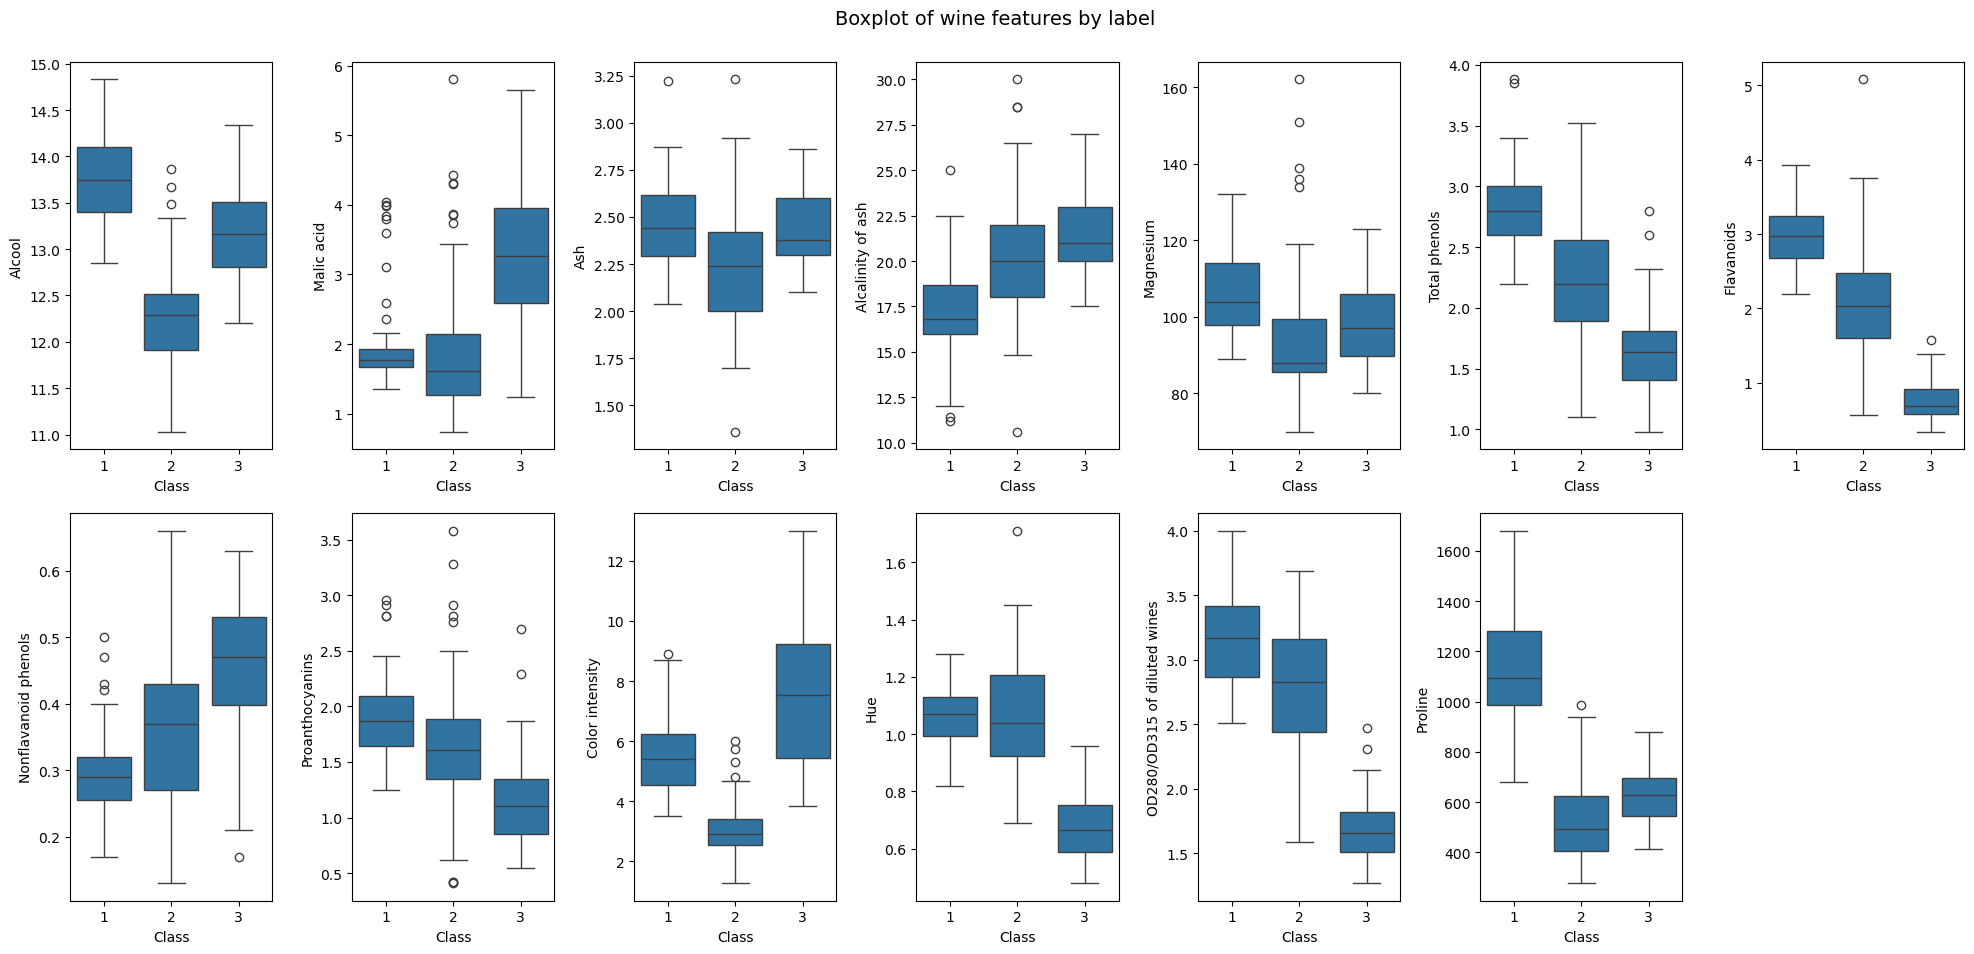

In [3]:
# Ajoutez votre code ici. Ajoutez des cellules si nécessaire. 

fig, axs = plt.subplots(2, 7, figsize=(20, 10)) # On spécifie le nombre de lignes et de colonnes de notre figure 
axs = axs.flatten() # -> 1D
 
#----------
# Pour i et chaque nom de colonne sauf class
# Boxplot avec pour x la Class, et pour y la variable. Utilisez ax=axs[i] pour insérer le plot dans la figure. !
#----------  
for i, col in enumerate(wines.columns[1:]): 
    sns.boxplot(x='Class', y=col, data=wines, ax=axs[i])
 
fig.suptitle('Boxplot of wine features by label', fontsize=14)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[13]) # Supprime le plot vide en bas à droite

---

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> La colonne "Class" contient notre variable dépendante (variable de sortie / output). Combien de classes différentes y a-t-il et à quoi correspondent-elles ? A quelle position se trouve cette colonne dans le DataFrame ?  </p> (2 points)

*Réponses:*



---
<a name="Part12"></a>
### 1.2 Boxplots, pairplot et choix des variables

[Début partie 1](#Part1) --- [Table des matières](#toc)


Maintenant que nous connaissons mieux les données, nous pouvons visualiser les différences entre classes afin de pouvoir créer des règles de classification. Le but, est de trouver des valeurs de variables permettant de séparer les différentes classes du mieux possible afin de pouvoir classifier de nouveaux vins. 

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Créez un boxplot pour chaque variables, groupées par Class.</p>
(4 points)

Pour faire ceci, complétez le code ci-dessous en vous basant sur le pseudo code donné en commentaire entre les "------". N'utilisez que 2 lignes: une pour la boucle et une pour le graphique.

- Aide: Pour obtenir les noms de colonnes utilisez *wines.columns*. Pour obtenir i dans la boucle, en plus des noms de colonne, utilisez la fonction *enumerate*.
- Aide: Utilisez le [slicing](https://stackoverflow.com/questions/509211/understanding-slicing) pour obtenir tous les noms de colonne sauf Class (qui se trouve à une extrémité de la liste). 
- Aide: Utilisez la fonction [sns.boxplot de Seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) pour un résultat élégant très coloré, ou la fonction [pandas.DataFrame.boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) pour un résultat épuré en toute simplicité.

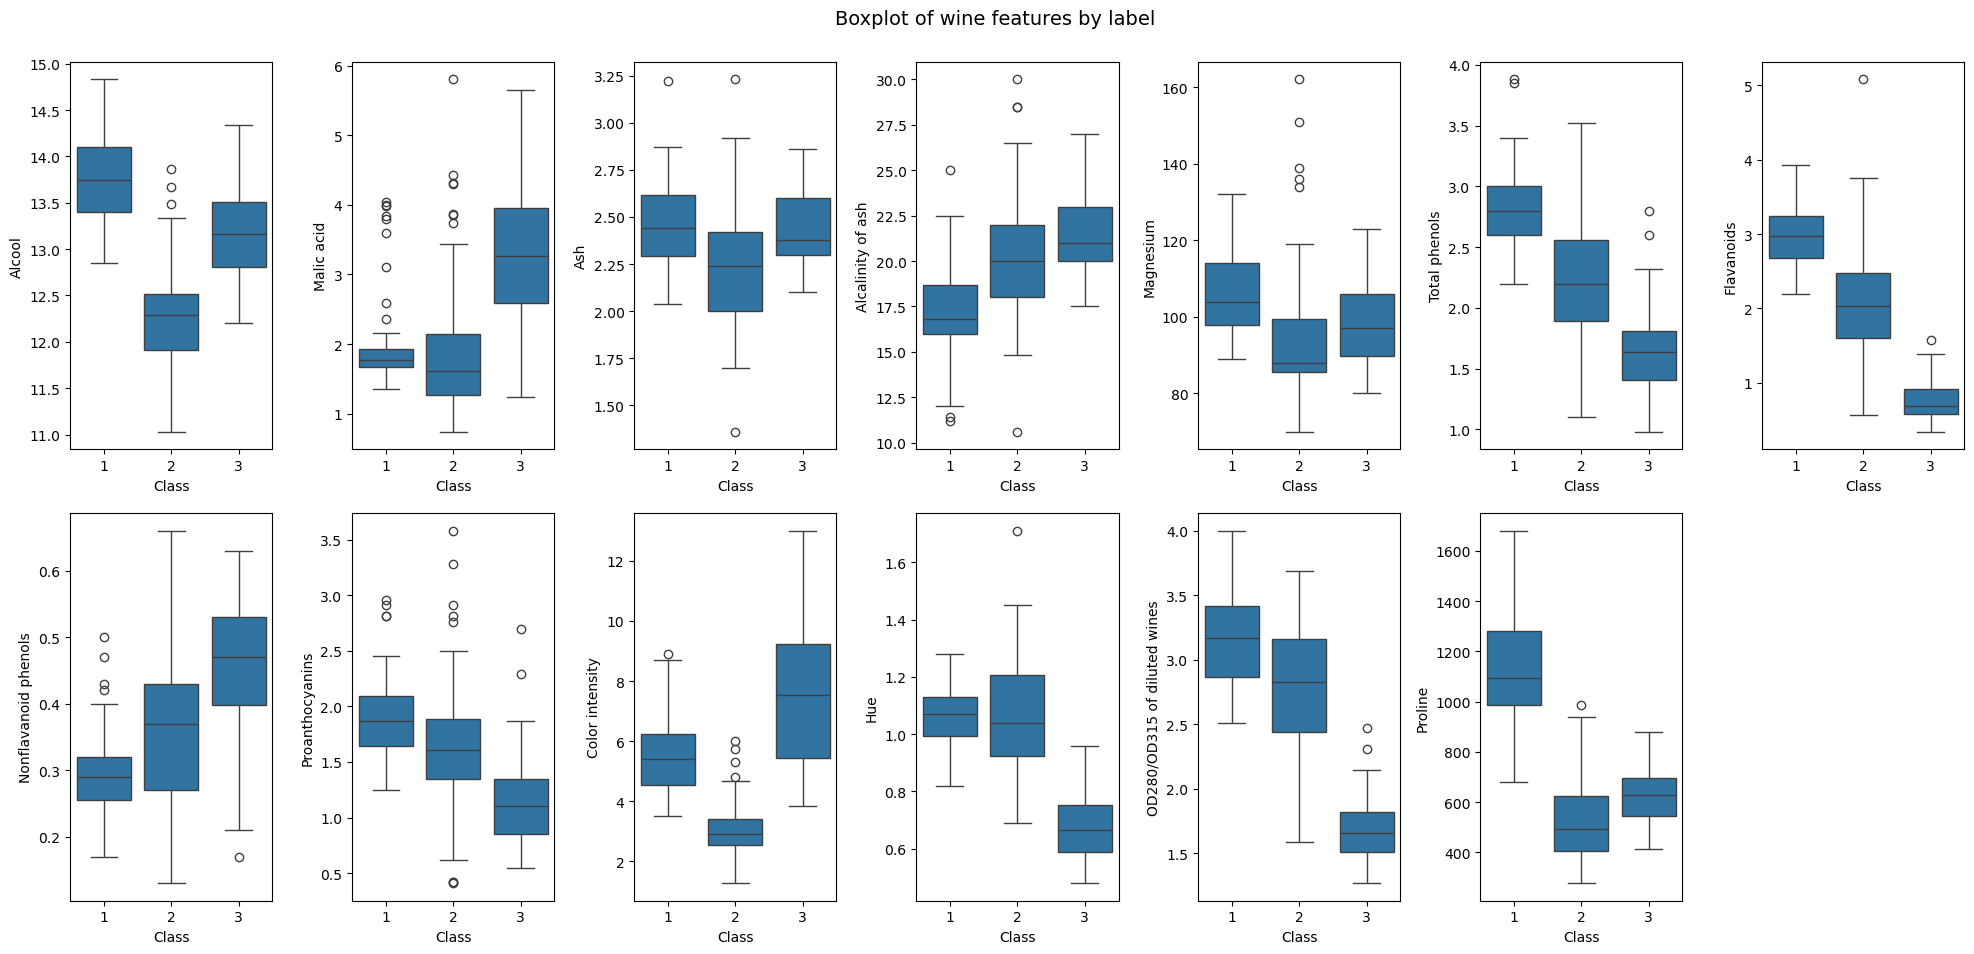

In [4]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10)) # On spécifie le nombre de lignes et de colonnes de notre figure 
axs = axs.flatten() # -> 1D

#----------
# Pour i et chaque nom de colonne sauf class
# Boxplot avec pour x la Class, et pour y la variable. Utilisez ax=axs[i] pour insérer le plot dans la figure. !
#----------  
for i, col in enumerate(wines.columns[1:]): 
    sns.boxplot(x='Class', y=col, data=wines, ax=axs[i])

fig.suptitle('Boxplot of wine features by label', fontsize=14)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[13]) # Supprime le plot vide en bas à droite

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Créez un Pairplot à l'aide de la librairie Seaborn</p>
(4 points)

****

Pour les données avec "peu" de variables, comme dans notre cas, un pairplot peut permettre d'obtenir une excellente vue d'ensemble. Cependant, la génération du pairplot peut prendre un certain temps. Pour éviter de prendre du temps à générer et re-générer le pairplot, vous pouvez commenter votre code une fois que vous avez analysé le graphique.

Note: Vous pouvez désactiver les Warnings s'il y en a. 

In [5]:
# Pairplot avec Seaborn - Votre code
#sns.pairplot(wines)
#plt.show()


---

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quels éléments du pairplot permettent de facilement distinguer si les différentes classes sont bien séparées les unes des autres ? </p> (2 points)

*Réponse:*

- Les couleurs différentes: Si les points de différentes couleurs (représentant différentes classes) sont bien regroupés et ne se mélangent pas, cela indique une bonne séparation.

- Histogrammes/Distributions sur la diagonale: Les histogrammes ou les courbes de densité sur la diagonale montrent la distribution de chaque variable pour chaque classe Ainsi, ça indique une bonne séparation.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> D'après les boxplots, quelles variables permettraient le mieux de distinguer/séparer les trois classes ? Et de distinguer une classe des deux autres ? Donnez 5 variables (en tout) soit pour séparer les 3 classes soit une des deux autres, ainsi que les valeurs approximatives de séparration. Justifiez et discutez votre choix. </p> (6 points)

<p></p>
<div style="background-color:#EEEEEE;padding:3px">Note: un modèle avec des règles simples peut permettre, par exemple, de distinguer deux classes l'une de l'autre. Par exemple pour distinguer un chat d'un chien sur des valeurs numérique on pourrait avoir les règles suivantes: 

- Si $souplesse < 2$ et $poids > 10$ -> c'est un chien
- Sinon -> c'est un chat. 

Pour pouvoir établir ces règles, il faut donc avoir une vue sur les différentes variables. Ce n'est pas parfait mais le modèle reste simple. Il fonctionnera dans une bonne partie des cas mais on peut toujours tomber sur un Chihuahua souple de moins de 5 kilos par exemple. 

*Réponse:*

- <b>Color intensity</b> : Les boxplots indiquent que la classe 3 a une intensité de couleur significativement plus élevée, ce qui permet de la distinguer des autres classes.Cette variable est particulièrement utile pour distinguer les vins de classe 3 des autres classes, car les valeurs de couleur sont souvent très différentes, permettant une classification claire.

- <b>Alcool</b> : Les boxplots montrent que la classe 1 a généralement des niveaux d'alcool plus bas, tandis que la classe 3 a des niveaux plus élevés. Cela permet une séparation claire entre les classes.

- <b>Flavanoids</b> : Les flavanoïdes sont des composés phénoliques qui influencent la couleur, le goût et la texture du vin. Les boxplots montrent que la classe 3 a des niveaux de flavanoïdes nettement plus élevés, ce qui est souvent associé à des vins de meilleure qualité. En observant les distributions, on peut noter que les classes 1 et 2 ont des valeurs de flavanoïdes qui se chevauchent, mais la classe 3 se distingue clairement par des valeurs plus élevées, ce qui permet une séparation efficace.

- <b>Proline</b> : La proline est un acide aminé qui peut influencer le goût et la structure du vin. Les boxplots montrent que la classe 3 a des niveaux de proline plus élevés, ce qui peut être associé à des techniques de vinification spécifiques ou à des cépages particuliers.

- <b>Magnesium</b> : Les boxplots montrent que la classe 3 a tendance à avoir des niveaux de magnésium plus élevés, ce qui peut être le résultat de différences dans le terroir, notamment la composition du sol. Les sols riches en minéraux peuvent favoriser des vignes plus saines et des raisins de meilleure qualité, ce qui se traduit par des vins plus complexes et plus riches en saveurs.



<a name="Part112pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 1.1 - 1.2: </b> Points obtenus: /20
</div>

Remarques de l'assistant: 
- Load data /2
- Q /2
- Plots /8
- Q /2
- Q /6


[Début partie 1](#Part1) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

<a name="Part13"></a>
### 1.3 Création du modèle à base de règles

[Début partie 1](#Part1) --- [Table des matières](#toc)



Suivez la structure du code ci-après pour implémenter un modèle à base de règles. Complétez les parties manquantes et écrivez les fonctions demandées. **Lisez bien les commentaires afin de bien comprendre la logique implémentée**.

#### 1.3.1 Définition des règles

Dans cette partie vous allez écrire les règles permettant de distinguer les trois classes (Note) à l'aide des variables `Alcool`, `Color intensity` et `Flavanoids`. Utilisez pour cela les valeurs que vous avez trouvées au TP3 ou servez vous des graphiques ci-dessus pour les déterminer. 

Servez-vous de la fonction donnée en exemple pour créer les fonctions suivantes (**respectez les noms !**): 

- *class_by_alcool()*: utilise la variable Alcool uniquement. 
- *class_by_flavanoids()*: utilise la variable Flavanoids uniquement.
- *class_by_color_intensity()*: utilise la variable Color intensity uniquement
- *class_by_flav_alcool()*: utilise les variables Flavanoids et Alcool
- *class_by_color_alcool()*: utilise les variables Color intensity et Alcool
- *class_by_color_flav()*: utilise les variables Color intensity et Flavanoids


In [6]:
# Les fonctions suivantes seront appliquées au DataFrame à l'aide de la fonction apply(). 
# Le DataFrame sera donc passé en paramètres et les opérations effectuées sur toutes les observations. 


# ------------------------------------------------------------------
# Définition des règles
# ------------------------------------------------------------------
'''
def class_by_XXXXXX(df): # ou class_by_XXXXXX_YYYYYY(df):
    """
    Retourne la classe (1, 2 ou 3) selon la variable XXXXXX (et YYYYYY -> en ayant accès à tout le dataframe, on peut
    aussi tester une seconde variable ou plus).
    """
    if(df["XXXXXX"] > 42 and....):
        return 1
    elif(df["YYYYYY"] > 42):
        return 2
    else:
        return 3
'''

    

# Complétez le code selon la donnée ci-dessus en respectant les noms de fonction. 

# ...


'\ndef class_by_XXXXXX(df): # ou class_by_XXXXXX_YYYYYY(df):\n    """\n    Retourne la classe (1, 2 ou 3) selon la variable XXXXXX (et YYYYYY -> en ayant accès à tout le dataframe, on peut\n    aussi tester une seconde variable ou plus).\n    """\n    if(df["XXXXXX"] > 42 and....):\n        return 1\n    elif(df["YYYYYY"] > 42):\n        return 2\n    else:\n        return 3\n'

#### 1.3.2 Prédictions

Pour chacune des règles créées ci-dessus, ajoutez une colonne dans df, une copie du DataFrame wines. Utilisez des noms parlants comme "pred_alcool" ou "pred_alcool_flav" afin que l'on comprenne bien de quelle prédiction il s'agit. Un exemple de l'utilisation de la fonction apply() est donné en commentaire. 


In [7]:
# ------------------------------------------------------------------
# Creation de la / des colonnes de prédiction 
# ------------------------------------------------------------------

# Copie du DataFrame pour ne pas modifier l'original accidentellement. 
df = wines.copy()

# Créez une nouvelle colonne qui contient le résultat de la fonction class_by_YYYYYY
# Faites le pour chaque fonction créées ci-dessus. 

# Exemple: df["pred_NNN"] = df.apply(class_by_YYYYYY, axis=1)



<a name="Part14"></a>
### 1.4 Matrice de confusion

[Début partie 1](#Part1) --- [Table des matières](#toc)




Affichez les scores (Accuracy) et matrices de confusion pour chaque règles. Pour cela, on utilise les fonctions **accuracy_score()**, **confusion_matrix()** et **ConfusionMatrixDisplay()** fournies par ScikitLearn et importée en amont de ce Notebook. 

Inspirez-vous du code partiellement donné en exemple ci-dessous. Vos résultats doivent cependant être présentés de manière à ce qu'on puisse savoir à quelle règle correspond quelle accuracy /  matrice de confusion. 

In [22]:
# ------------------------------------------------------------------
# Pour chaque modèle (6x), affichez le score (Accuracy) et la matrice de confusion (code ci-dessous)
# ------------------------------------------------------------------

# Vous pouvez écrire une boucle pour afficher le score et la matrice à la suite ou dans des cellules séparées. 
# Libre à vous de choisir la solution qui vous plait le plus !

for rule in df

score = accuracy_score(...)
print(f"Accuracy: {score}")

cm = confusion_matrix(...)
disp = ConfusionMatrixDisplay(...)
disp.plot()
plt.show()


La colonne pred_alcool n'existe pas dans le DataFrame.
La colonne pred_flav n'existe pas dans le DataFrame.
La colonne pred_color n'existe pas dans le DataFrame.
La colonne pred_flav_alcool n'existe pas dans le DataFrame.
La colonne pred_color_alcool n'existe pas dans le DataFrame.
La colonne pred_color_flav n'existe pas dans le DataFrame.


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Laquelle de vos règles donne le meilleur résultat ? Y a-t-il une classe plus difficile à prédir qu'une autre ?</p>

*Réponses:*

<a name="Part134pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 1.3 - 1.4: </b> Points obtenus: /16
</div>

Remarques de l'assistant: 
- Règles (6) et prédictions (4 pts): /10
- Matrices de confusion: /4
- Question: /2


[Début partie 1](#Part1) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

---

<p style="background-color:#7ba3e3;padding:10px"><font size="6"><b></b></font></p>

---

<a name="Part2"></a>

## Partie 2 - L'algorithme des k plus proches voisins (k-NN) 

[Table des matières](#toc)

Dans cet exercice, nous allons utiliser KNN pour traiter le problème de classification des vins.  


[- 2.1 Implémentation](#Part21)    ----    [12 points](#Part21pts)

[- 2.2 Validation hold-out](#Part22)    ----    [10 points](#Part22pts)

[- 2.3 N-Folds Cross Validation](#Part23)    ----    [10 points](#Part23pts)

[- 2.4 Conclusion](#Part24)    ----    [8 points](#Part24pts)


<a name="Part21"></a>
### 2.1 Implémentation et préparration des données
[Table des matières](#toc)

Le code suivant est tiré du cours. Complétez les [docstrings](https://www.datacamp.com/tutorial/docstrings-python#multi-line-docstring-multi) de manière à indiquer ce que fait la fonction, quels sont les paramètres ainsi que la valeur de retour. Ajoutez en plus des commentaires sur les parties complexes afin de montrer que vous avez compris l'implémentation de KNN. 


In [9]:
# Code du cours - TODO Complétez les docstrings 


def train_test_split(dataset, split=0.60):
    """
    
    """
    train = list()
    train_size = split * len(dataset)
    test = list(dataset)
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))
    return train, test


def euclidean_distance(row1, row2):
    """
    
    """

    distance = 0.0
    for i in range(1, len(row1)): # All columns except the first one (Note) - Wrong in course's PDF
        distance += (row1[i] - row2[i])**2
    
    return sqrt(distance)


def get_neighbors(train, test_row, num_neighbors):
    """
    
    """
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors


def predict_classification(train: pd.DataFrame, test_row, num_neighbors):
    """
    
    """
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[0] for row in neighbors]
    #print(f"Output values classification: {output_values}")
    prediction = max(set(output_values), key=output_values.count)
    return prediction


def accuracy_metric(actual: list[float], predicted: list[float]):
    """
    
    """
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


def cross_validation_split(dataset, n_folds):
    """
    
    """
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split


Création de deux datasets: 
- un avec les données brutes
- un avec les données normalisées

**Lisez sans modifier le code ci-dessous pour en comprendre le sens et répondez aux questions.**

In [10]:
# Préparation des datasets - rien à modifier

#=====================================================================
# Préparation des données brutes 
#=====================================================================

# Conversion en liste de listes au lieu de DataFrame
data = wines.values.tolist()

#=====================================================================
# Préparation des données normalisées
#=====================================================================


# Différents moyens de standardiser les données mise à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Nous allons utiliser le StandardScaler, qui va normaliser les données avec une moyenne de 0 et un écart-type de 1
scaler = StandardScaler()
scaler_string = "StandardScaler" # pour l'affichage dans le titre des plots si nécessaire


# Créer une copie et prendre une liste des colonnes des données indépendantes (entrées)
df_normalized = wines.copy()
cols = wines.columns[wines.columns != 'Note']

# Remplacer les colonnes des données par les données transformées
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

# conversion en liste de listes pour k-NN
data_normalized = df_normalized.values.tolist()

# K's à tester
Ks = [1, 2, 3, 5, 7, 10]

**Ci-dessous, affichez les boxplots des données normalisées, comme pour les données du [point 1.2](#Part12).**

In [11]:
# Votre code




<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quelle est la différence entre un commentaire et une docstring ? </p> (1 point)

*Réponse:*

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Qu'est-ce que la normalisation des données ? </p> (1 point)

Décrivez le concept en quelques mots. Attention, les termes "Normalisation" et "Standardisation" sout souvents mélangés mais le concept général reste le même !


*Réponse:*



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles sont les différences entre les StandardScaler, MinMaxScaler et RobustScaler ?</p> (3 points)

Note: Aidez-vous de [la doc](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) ou d'autres ressources pour répondre. 

*Réponse:*

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles différences observez-vous entre les boxplots des données originales du point 1.2 par rapport aux boxplots avec les données normalisées ?</p>(1 points)

Voir [point 1.2](#Part12). 

*Réponse:*

<a name="Part21pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.1: </b> Points obtenus: /12
</div>

Remarques de l'assistant: 

- docstrings: /6
- Questions: /6


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>



<a name="Part22"></a>
### 2.2 Validation hold-out
[Table des matières](#toc)

Nous allons ici utiliser la méthode "Validation Hold-Out" avec k-NN sur nos données. 

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Complétez le code ci-dessous en suivant les indications en commentaire. Respectez le nombre de lignes indiqué.</p> (6 points)



Utilisez en premier le dataset "***data***" puis une fois votre code fonctionnel, ajoutez un niveau de boucle et effectuez la même opération en plus pour le dataset avec les données normalisées: "***data_normalized***". 



*Supprimez aussi le print() dans la boucle qui est là pour que le code fonctionne avant que vous l'ayez complété.* 

Aide: 
- Vous devez modifier différentes variables, comme par exemple ajouter une dimention à la variable qui contient les résultats. Pour cela on vous conseille de créer deux dictionnaires (comme c'est déjà fait), un pour les données originales et un pour les données normalisées puis de créer une liste "results" contenant vos deux dictionnaires de résultats. N'oubliez pas de modifier le titre des graphiques pour plus de clareté (indiquez quel données sont utilisées). 
- Si vous voulez boucler sur les éléments d'une liste (contenant par exemple deux datasets) vous pouvez utiliser la fonction *enumerate()* qui retourne chaque élément en plus d'un indice (qu'on appelera j ou l par exemple)
- Pour adapter le titre de vos graphiques, vous pouvez simplement créer une liste avec deux titres et utiliser votre variable de boucle pour choisir le bon titre





----- N = 0 - k = 1 -----
----- N = 0 - k = 2 -----
----- N = 0 - k = 3 -----
----- N = 0 - k = 5 -----
----- N = 0 - k = 7 -----
----- N = 0 - k = 10 -----
----- N = 1 - k = 1 -----
----- N = 1 - k = 2 -----
----- N = 1 - k = 3 -----
----- N = 1 - k = 5 -----
----- N = 1 - k = 7 -----
----- N = 1 - k = 10 -----
----- N = 2 - k = 1 -----
----- N = 2 - k = 2 -----
----- N = 2 - k = 3 -----
----- N = 2 - k = 5 -----
----- N = 2 - k = 7 -----
----- N = 2 - k = 10 -----
----- N = 3 - k = 1 -----
----- N = 3 - k = 2 -----
----- N = 3 - k = 3 -----
----- N = 3 - k = 5 -----
----- N = 3 - k = 7 -----
----- N = 3 - k = 10 -----
----- N = 4 - k = 1 -----
----- N = 4 - k = 2 -----
----- N = 4 - k = 3 -----
----- N = 4 - k = 5 -----
----- N = 4 - k = 7 -----
----- N = 4 - k = 10 -----
----- N = 5 - k = 1 -----
----- N = 5 - k = 2 -----
----- N = 5 - k = 3 -----
----- N = 5 - k = 5 -----
----- N = 5 - k = 7 -----
----- N = 5 - k = 10 -----
----- N = 6 - k = 1 -----
----- N = 6 - k = 2 -----
----- 

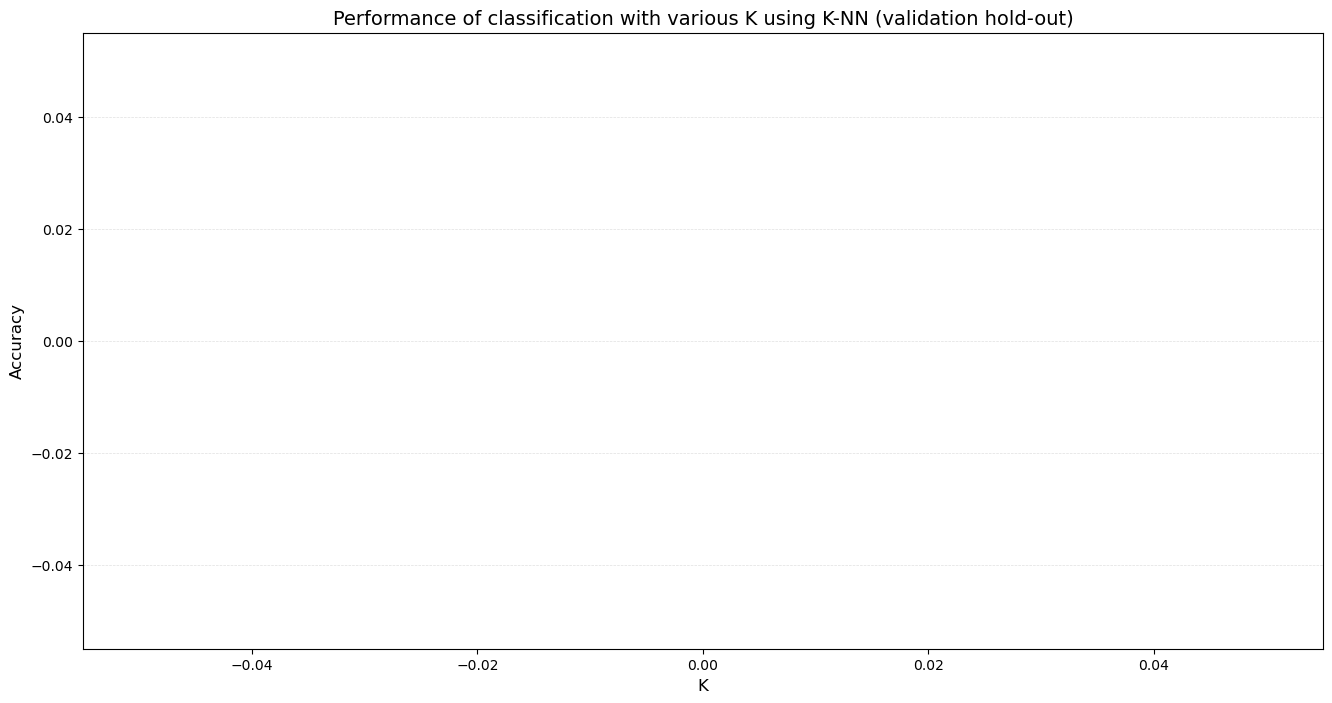

In [12]:
# Complétez le code ci-dessous. Attention, les données sont dans "data"/"data_normalized" et non dans "wines":


# Nous voulons 10 répétitions avec la méthode validation hold-out
N_REPETITIONS = 10

# Nous allons stocker les résultats dans un dictionnaire, avec pour chaque k une liste d'accuracy. 
results = defaultdict(list)

# Pour chaque validation hold-out (test et train set différents) on test chaque k
for i in range(N_REPETITIONS):
    for k in Ks:
        print(f"----- N = {i} - k = {k} -----")  # Vous pouvez supprimer cette ligne une fois votre code fonctionnel
                                                 # Pour que le code tourne, la boucle ne doit pas être vide ;-)  
        
        # Faire le train-test split avec split = 0.8. 
        # La fonction retourne deux éléments, utilisez le unpacking pour les extraire (train, test = fct())
        # - complétez - 1 ligne
        
        
        # Obtenir les prédictions à l'aide de la fonction predict_classification()
        # Aide: utilisez la compréhension de liste:  prédictions = [prediction(...) for ... in ...] 
        #                                                                           pour chaque observation de test
        #       Vous devez générer une liste de prédictions (1, 2 ou 3), que vous comparerez en dessous avec 
        #         les valeurs justes pour obtenir l'accuracy.
        
        # - complétez - 1 ligne
        
        
        # Joindre à results[k] la liste des accuracies (obtenu avec la fonction accuracy_metric() ci dessus)
        # Aide: utilisez la méthode append() pour joindre l'accuracy aux résultats
        # Aide: utilisez la méthode accuracy_metric() pour obtenir l'accuracy
        # Aide: Vous avez une liste de prédictions et un dataframe original (test)
        #       utilisez la compréhension de liste pour créer la liste des données originales:
        #         [colone "note" pour chaque ligne des tests]
        
        # - complétez - 1 ligne (si vous y arrivez, sinon plus)
        

# Une fois le code fonctionnel, vous devrez bouger le graphique à l'intérieur de la boucle 
# N'oubliez pas de changer le titre selon les données utilisées !

_, ax = plt.subplots(1, 1, figsize=(16, 8))

means = [np.mean(v) for v in results.values()]
stds = [np.std(v) for v in results.values()]

ax.errorbar(results.keys(), means, stds, linestyle='None', marker='D', color='darkgreen')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('K', fontsize=12)
ax.set_title('Performance of classification with various K using K-NN (validation hold-out)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Pour quelle valeur(s) de k le modèle est-il le plus efficace sans et avec les données normalisées ? Une fois les données normalisées, quelle différence observe-t-on ? Justifiez.</p>
(2 points)

Note: Les résultats peuvent varier d'une exécution à l'autre. Indiquez la tendance générale que vous observez.



*Réponse:*



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Pourquoi les résultats varient d'une exécution à une autre ? Décrivez le fonctionnement de ce que vous venez de faire (point 2.1) en quelques phrases.</p> (2 points)

*Réponse:*

<a name="Part22pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.2: </b> Points obtenus: /10
</div>

Remarques de l'assistant: 

- Exercice code: /6
- Q /4


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>


<a name="Part23"></a>
### 2.3 N-Folds cross validation
[Table des matières](#toc)


Si vous voulez vous raffraichir sur ce qu'est la N-Fold Cross Validation, voici [une courte vidéo de StatQuest](https://www.youtube.com/watch?v=fSytzGwwBVw) (ou [une autre en français](https://www.youtube.com/watch?v=xWgGOHiROmc)).

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Complétez le code ci-dessous en suivant les indications en commentaire, cette fois en utilisant la N-fold cross validation.</p>(6 points)

Note: 
- Aussi appelée k-fold cross validation dans la litérature, mais là on veut pas confondre avec notre k de k-NN. 

Utilisez en premier le dataset "***data***" puis une fois votre code fonctionnel, ajoutez un niveau de boucle et ajoutez le dataset avec les données normalisées: "***data_normalized***" comme au [point 2.2](#Part22). N'oubliez pas de modifier les parties nécessaires ainsi que le titre des graphiques pour que le résultat soit lisible. 

*Supprimez aussi le print() dans la boucle qui est là pour que le code fonctionne avant que vous l'ayez complété.* 

----- Fold = 0 - k = 1 -----
----- Fold = 1 - k = 1 -----
----- Fold = 2 - k = 1 -----
----- Fold = 3 - k = 1 -----
----- Fold = 4 - k = 1 -----
Performance with k=1: []
----- Fold = 0 - k = 2 -----
----- Fold = 1 - k = 2 -----
----- Fold = 2 - k = 2 -----
----- Fold = 3 - k = 2 -----
----- Fold = 4 - k = 2 -----
Performance with k=2: []
----- Fold = 0 - k = 3 -----
----- Fold = 1 - k = 3 -----
----- Fold = 2 - k = 3 -----
----- Fold = 3 - k = 3 -----
----- Fold = 4 - k = 3 -----
Performance with k=3: []
----- Fold = 0 - k = 5 -----
----- Fold = 1 - k = 5 -----
----- Fold = 2 - k = 5 -----
----- Fold = 3 - k = 5 -----
----- Fold = 4 - k = 5 -----
Performance with k=5: []
----- Fold = 0 - k = 7 -----
----- Fold = 1 - k = 7 -----
----- Fold = 2 - k = 7 -----
----- Fold = 3 - k = 7 -----
----- Fold = 4 - k = 7 -----
Performance with k=7: []
----- Fold = 0 - k = 10 -----
----- Fold = 1 - k = 10 -----
----- Fold = 2 - k = 10 -----
----- Fold = 3 - k = 10 -----
----- Fold = 4 - k = 10 -----


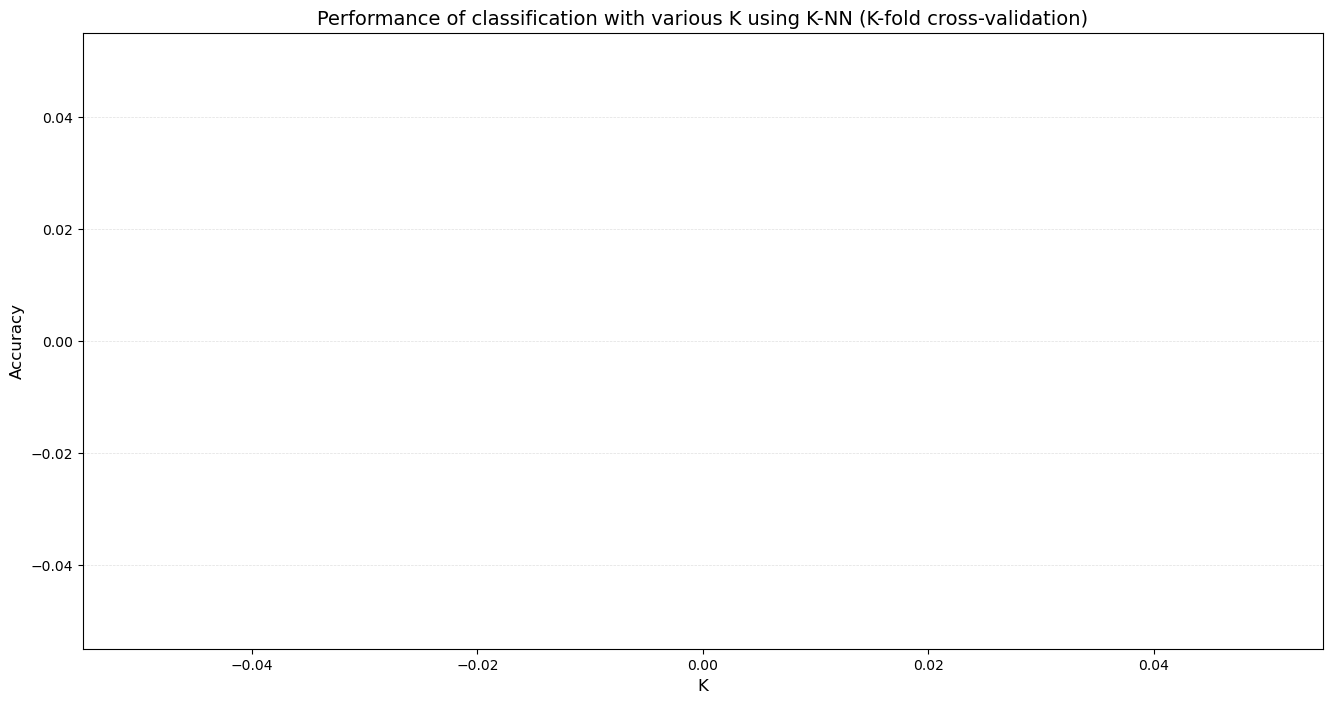

In [13]:
results_nfold = defaultdict(list)

# Les données sont divisées en plusieurs folds 
folds = cross_validation_split(data, n_folds=5)
    
for k in Ks:
    
    # Listes qui vont contenir les valeurs prédites et les vraies valeurs
    predictions = []
    actuals = []

    for test_i in range(len(folds)):
        print(f"----- Fold = {test_i } - k = {k} -----") 
        
        # train = tout sauf le fold i, qui est utilisé pour tester.
        # Permet de créer une liste à partir des éléments de folds, y compris si c'est vide. 
        train = list(itertools.chain.from_iterable(folds[:test_i] + folds[test_i+1:]))
            
        # test = Fold courrant, utilisé pour tester
        # - complétez - 1 ligne
        
        
        # Effectue la prédiction et l'ajoute au tableau prédictions[] pour chaque element dans test
        # predictions += [...fonction pour faire la classification définie en début de point 2.... for....in ....]
        # - complétez - 1 ligne
        
        
        # Remplit la liste "actual" avec les valeurs réelles (actuals += ... )
        # - complétez - 1 ligne
            
    
    # Mettez le résultat de "accuracy_metric(...,...)" dans results_nfold[k]
    # - complétez - 1 ligne
    
    print(f'Performance with k={k}: {results_nfold[k]}')
    
_, ax = plt.subplots(1, 1, figsize=(16, 8))


# Une fois le code fonctionnel pour un dataset, vous devrez bouger les graphiques à l'intérieur de la boucle 
# comme au point 2.2. 

ax.plot(results_nfold.keys(), results_nfold.values(), linestyle='None', marker='D')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('K', fontsize=12)
ax.set_title(f'Performance of classification with various K using K-NN (K-fold cross-validation)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelle différence dans les code des points 2.2 (validation hold-out et 2.3 (N-Fold cross validation) fait que nous n'avons qu'un seul point par k et non une moyenne et écart-type ? </p>(2 points)

*Réponse:*

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Les résultats varient-ils d'une exécution à l'autre ? Décrivez le fonctionnement de ce que vous venez de faire (point 2.2) en quelques phrases. </p>(2 points)

*Réponse:*



<a name="Part23pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.3: </b> Points obtenus: /10
</div>

Remarques de l'assistant: 
- code /6
- Q /4


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>



<a name="Part24"></a>
### 2.4 Conclusion
[Début partie 2](#Part2) --- [Table des matières](#toc)



Répondez aux questions suivantes **en faisant des phrases**. 

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quels sont les principaux avantages de l'utilisation des modèles basés sur des règles par rapport à d'autres algorithmes d'apprentissage automatique comme le KNN ? </p>(2 points)

*Réponse:*

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Comparez et contrastez les techniques de validation hold-out et de N-Fold Cross Validation dans le contexte de l'évaluation des performances d'un classifieur KNN. </p>(4 points)

*Réponse:*

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Comment la nature "lazy learning" du KNN impacte-t-elle ses performances et son efficacité computationnelle par rapport à d'autres algorithmes ? </p>(2 points)

*Réponse:*

<a name="Part24pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.4: </b> Points obtenus: /8
</div>

Remarques de l'assistant: 


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

Fin